In [2]:
# NYC Airbnb Listings - Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style = "whitegrid")

In [5]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.645290,-73.972380,Private room,285.0,30,9,2018-10-19,0.08,6,347,0,NaN
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240.0,30,49,2022-06-21,0.26,3,312,0,NaN
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,80,0,NaN
3,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,97.0,30,196,2025-06-09,1.00,1,219,4,NaN
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.801070,-73.942550,Private room,NaN,30,1,2022-06-05,0.03,2,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,1437489193231265423,Charming 1 br Retreat 2 min UBS,339584418,Adetunji,Queens,Queens Village,40.714060,-73.733160,Entire home/apt,134.0,30,0,NaN,NaN,3,365,0,NaN
36318,1437558502175065750,"Blueground | Hell's Kitchen, BBQ, nr Hudson River",107434423,Blueground,Manhattan,Hell's Kitchen,40.761701,-73.999623,Entire home/apt,649.0,30,0,NaN,NaN,1054,306,0,NaN
36319,1437716663281487811,Beautiful 1-bedroom Apartment,247439246,Charlene,Manhattan,Upper East Side,40.763030,-73.962800,Entire home/apt,259.0,30,0,NaN,NaN,9,320,0,NaN
36320,1437717590842865352,Spacious Comfort Beach-Walk,699701332,Adepeju,Queens,Arverne,40.592956,-73.797732,Private room,67.0,30,0,NaN,NaN,1,365,0,NaN


In [6]:
# Data Cleaning

# Converting date column

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [9]:
df['price'].unique()

array([ 285.,  240.,  215., ..., 1854.,  993.,    8.])

In [10]:
# Converting price to numeric (removing commas or dollar signs where required)

if df['price'].dtype == 'object':
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [14]:
df['reviews_per_month']

0        0.08
1        0.26
2        0.03
3        1.00
4        0.03
         ... 
36317     NaN
36318     NaN
36319     NaN
36320     NaN
36321     NaN
Name: reviews_per_month, Length: 36322, dtype: float64

In [15]:
# Filling NaN with 0 i.e. 0 review

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [17]:
# Dropping rows with missing values

df.dropna(subset=['neighbourhood_group', 'room_type'], inplace = True)

In [18]:
# Removing extreme values

df = df[df['price'] > 0]
df = df[df['price'] < 5000]
df = df[df['minimum_nights'] <= 365]

In [20]:
# EDA Questions

# 1 Avg price by neighbourhood group

avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price

,neighbourhood_group,price
0,Bronx,115.318985
1,Brooklyn,174.791359
2,Manhattan,309.596359
3,Queens,137.256379
4,Staten Island,124.877358


In [21]:
# 2 Price distribution by room type and borough

price_grouped = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
price_grouped

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,162.707989
1,Bronx,Private room,83.639042
2,Brooklyn,Entire home/apt,239.820772
3,Brooklyn,Hotel room,319.400000
4,Brooklyn,Private room,106.166858
5,Brooklyn,Shared room,92.041667
6,Manhattan,Entire home/apt,350.633069
7,Manhattan,Hotel room,650.032787
8,Manhattan,Private room,204.390699
9,Manhattan,Shared room,216.500000


In [31]:
# 3 Number of listings by neighbourhood_group and room_type

nums_listing = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
nums_listing

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,363
1,Bronx,Private room,543
2,Brooklyn,Entire home/apt,3755
3,Brooklyn,Hotel room,5
4,Brooklyn,Private room,3482
5,Brooklyn,Shared room,72
6,Manhattan,Entire home/apt,6568
7,Manhattan,Hotel room,61
8,Manhattan,Private room,2731
9,Manhattan,Shared room,32


In [34]:
# 4 Availability stats

availability_stats = df.groupby('neighbourhood_group')['availability_365'].describe()
availability_stats

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,906.0,266.692053,106.336582,0.0,191.0,300.0,364.00,365.0
Brooklyn,7314.0,240.920837,107.881489,0.0,164.0,268.0,345.00,365.0
Manhattan,9392.0,244.471146,104.850754,0.0,172.0,274.0,329.00,365.0
Queens,3331.0,248.702492,110.607821,0.0,167.0,270.0,354.00,365.0
Staten Island,318.0,264.811321,95.863117,24.0,186.0,270.0,360.75,365.0


In [37]:
# 5 Reviews analysis

review_stats = df[['number_of_reviews', 'reviews_per_month']].describe()
review_stats

,number_of_reviews,reviews_per_month
count,21261.000000,21261.000000
mean,35.839659,0.805860
std,81.241751,1.952952
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.000000,0.210000
75%,37.000000,0.940000
max,3277.000000,121.970000


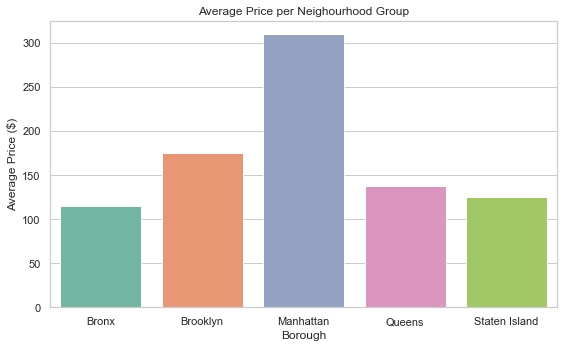

In [46]:
# Bar plot: Average price by borough

plt.figure(figsize=(8,5))
sns.barplot(data=avg_price, x='neighbourhood_group', y='price', palette='Set2')
plt.title('Average Price per Neighourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

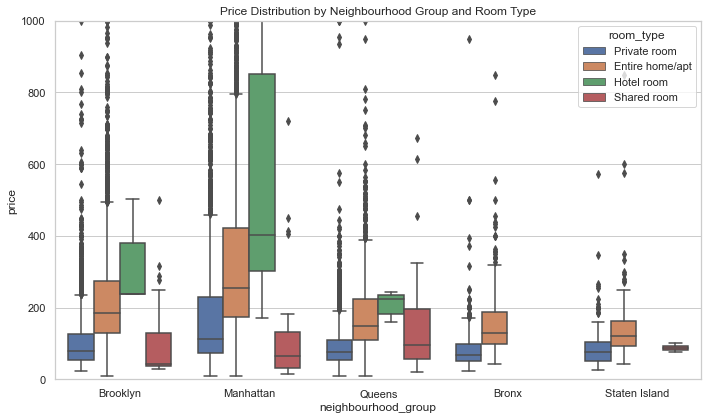

In [47]:
# Boxplot: Price distribution by room type and borough

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.ylim(0, 1000)
plt.title('Price Distribution by Neighbourhood Group and Room Type')
plt.tight_layout()
plt.show()

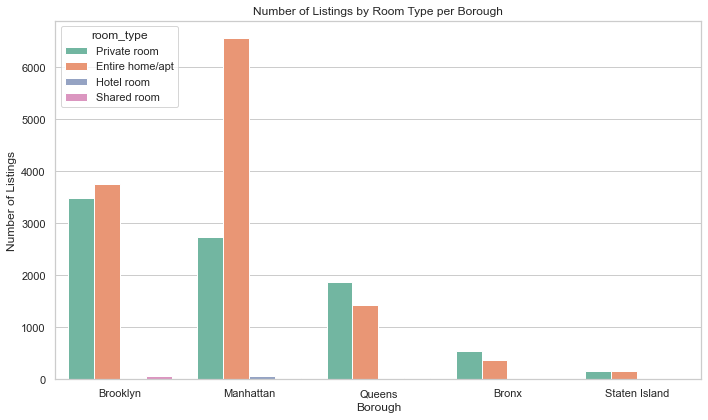

In [48]:
# Count plot: Number of listings per room type by borough

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='Set2')
plt.title('Number of Listings by Room Type per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

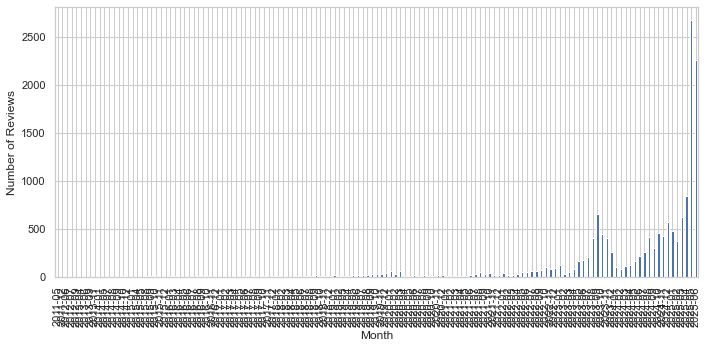

In [49]:
# Histogram: Distribution of last_review

plt.figure(figsize=(10,5))
df['last_review'].dropna().dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()